In [1]:
## import Python libraries and functionality

import pandas as pd
from scipy import stats
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
def get_option_price(S, K, r, T, sigma):
        
    d1= ((np.log(S/K)) + (r+(sigma**2)/2)*T)/(sigma*(np.sqrt(T)))
    d2= d1-(sigma*(np.sqrt(T)))

    Nd1= scipy.stats.norm.pdf(d1)
    Nd2= scipy.stats.norm.pdf(d2)

    calculated_option_price = (S*Nd1) - (K*(np.exp(-r*T))*Nd2)

    return calculated_option_price

In [3]:
def get_gamma_distributions(rho, iterations, shape, scale):
    
    Delta_S = stats.gamma(shape, scale,).rvs(iterations)
    Delta_temp = stats.gamma(shape, scale,).rvs(iterations)
    Delta_Sigma = rho * Delta_S + np.sqrt(1 - rho**2) * Delta_temp
    
    return Delta_S, Delta_Sigma

In [4]:
def get_option_price_returns(Delta_S, Delta_Sigma, S, K, r, T, sigma):
    
    iterations = len(Delta_S)
    delta_t = T / 252
    S_scenarios = Delta_S * S
    sigma_scenarios = Delta_Sigma * sigma
    option_price_scenarios = np.zeros(iterations)
    
    for i in range(0, iterations):
        option_price_scenarios[i] = get_option_price(S_scenarios[i], K, r, delta_t, sigma_scenarios[i])
    
    return option_price_scenarios

In [5]:
x, y =  get_gamma_distributions(0.5, 2500, 1, 0.25)
x

array([0.70392199, 0.60716434, 0.58722781, ..., 1.39278658, 1.15784622,
       3.31510851])

In [6]:
y

array([1.3032068 , 3.55652647, 1.88983675, ..., 1.80622333, 0.88885883,
       2.57651609])

In [7]:
np.corrcoef(x,y)

array([[1.        , 0.52103905],
       [0.52103905, 1.        ]])

In [8]:
prices = get_option_price_returns(x, y, 100, 100, 0.025, 1, 0.25)
prices

array([-3.51923869e-076,  1.97215226e-031, -1.27659428e-082, ...,
       -1.05377645e-042, -2.11588983e-037, -1.22157941e-201])

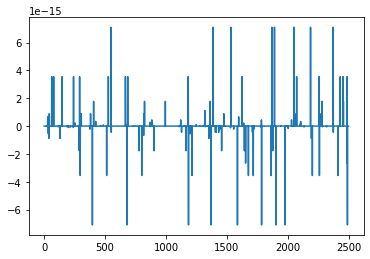

In [9]:
plt.plot(prices)

In [10]:
sorted_prices = np.sort(prices)
q1 = sorted_prices.size*(1-0.99)
VaR_99 = sorted_prices[int(q1)]
VaR_99

-1.7763568394002505e-15

In [11]:
ES_99 = sorted_prices[:int(q1)].sum()/sorted_prices[:int(q1)].size
ES_99

-4.476419235288631e-15

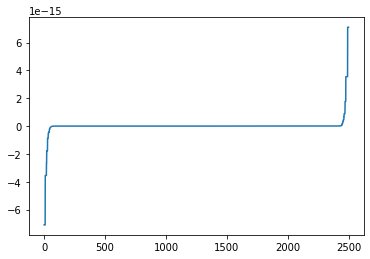

In [12]:
plt.plot(sorted_prices)